In [1269]:
#------- EXERCICI 1 --- ACABAT
import pandas as pd

data = pd.read_csv('DelayedFlights.csv')

df = data.sample(n=200000, replace=False)

df = df[[
    #'Unnamed: 0', 'Year', 'Month', 'DayofMonth',
    'DayOfWeek',
    #'DepTime',
    #'CRSDepTime', 'ArrTime', 'CRSArrTime',
    'UniqueCarrier', 'FlightNum', 'TailNum', 'ActualElapsedTime',
    #'CRSElapsedTime',
    'AirTime', 'ArrDelay', 'DepDelay', 'Origin', 'Dest', 'Distance', 
    #'TaxiIn', 'TaxiOut', 'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
    #'WeatherDelay', 'NASDelay', 'SecurityDelay',
    #'LateAircraftDelay'
    ]].copy()

En este dataset podemos encontrar información sobre los vuelos de 20 aerolíneas comerciales en los Estados Unidos en 2008. Ésta muestra del dataset contiene 30 columnas con datos sobre 200.000 vuelos tanto antes de realizarse, así como tras la finalización de los mismos. De esta manera, por ejemplo, podemos obtener información sobre retrasos, desviaciones o cancelaciones y sus causas.

Puesto que no sabría extraer información de ello, podría eliminar las dos columnas que hacen referencia a la bajada y la subida del tren de aterrizaje (TaxiIn y TaxiOut).

Por otro lado, tambien puedo eliminar todas las columnas que se refieren a los retrasos y las cancelaciones según la causa, así como las columnas sobre la fecha como "Year", "Month" o "DayOfMonth", como también aquellas relacionadas con la programación original del vuelo como "CRSDepTime" o "CRSElapsedTime", ya que tampoco haré uso de estas columnas para los ejercicios que siguen.

Finalmente, modifico el nombre de las columnas para facilitar la lectura y vuelvo a indexar los registros para darles un valor entre 0 y 200.000 acorde con la totalidad de la muestra y no con la base de datos original.

In [1270]:
df = df.rename(columns = {'DayOfWeek':'Day_Of_Week',
                          'UniqueCarrier':'Carrier',
                          'FlightNum':'Flight_Number',
                          'TailNum':'Tail_Number',
                          'ActualElapsedTime':'Actual_Elapsed_Time',
                          'AirTime':'Air_Time',
                          'ArrDelay':'Arrival_Delay',
                          'DepDelay':'Departure_Delay',
                          'Dest':'Destination'}) \
    .reset_index(drop=True)

In [1271]:
df.describe()

,Day_Of_Week,Flight_Number,Actual_Elapsed_Time,Air_Time,Arrival_Delay,Departure_Delay,Distance
count,200000.000000,200000.000000,199143.00000,199143.000000,199143.000000,200000.000000,200000.000000
mean,3.984500,2179.884515,133.53914,108.503010,42.238452,43.210735,767.218140
std,1.994598,1940.689048,72.30047,68.894476,56.837888,53.523171,575.674506
min,1.000000,1.000000,15.00000,1.000000,-70.000000,6.000000,30.000000
25%,2.000000,610.000000,80.00000,58.000000,9.000000,12.000000,340.000000
50%,4.000000,1537.000000,116.00000,90.000000,24.000000,24.000000,609.000000
75%,6.000000,3416.000000,165.00000,137.000000,56.000000,53.000000,999.000000
max,7.000000,9740.000000,776.00000,645.000000,1542.000000,1545.000000,4962.000000


Al ejecutar la función describe() podemos ver que faltan algunos datos en al menos 3 columnas, por lo que tendremos que volver a ellas más adelante.

Por otro lado, también podemos observar que el valor mínimo de la columna 'Arrival_Delay' es negativo. Esto es normal, ya que en esta misma columna se expresa mediante un valor negativo cuando el vuelo llega antes de lo programado.

Sin embargo, el valor máximo de la misma columna de 'Arrival_Delay' parece demasiado elevado en comparación con el 75% más bajo, que a penas llega a la hora de retraso, así que acto seguido miraremos si sigue una progresión normal.

Finalmente, también podemos observar que el valor mínimo de la columna 'Distance' parece muy bajo para un trayecto en avión, por lo que podría ser un error a primera vista, sin emabrgo al ver la cantidad de vuelos por distancia vemos que es normal que haya trayectos así de cortos.

<Axes: ylabel='Frequency'>

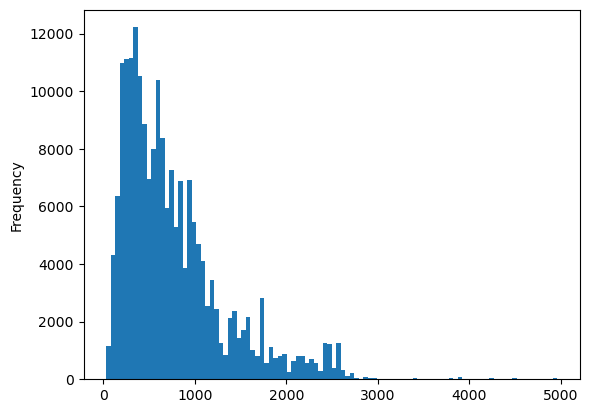

In [1272]:
df['Distance'].plot(kind='hist', bins=100)
#df0 = df[['Distance', 'Origin', 'Destination']]
#df0.groupby('Distance')
#df0.sort_values(by='Distance', ascending=True)[:5]

De vuelta al valor máximo de la misma columna de 'Arrival_Delay', al consultar en un histograma la distribución de los registros según el tiempo de retraso, podemos observar que parece disminuir de manera normal y que sean pocos los vuelos que acumulan mucho retraso.

<Axes: ylabel='Frequency'>

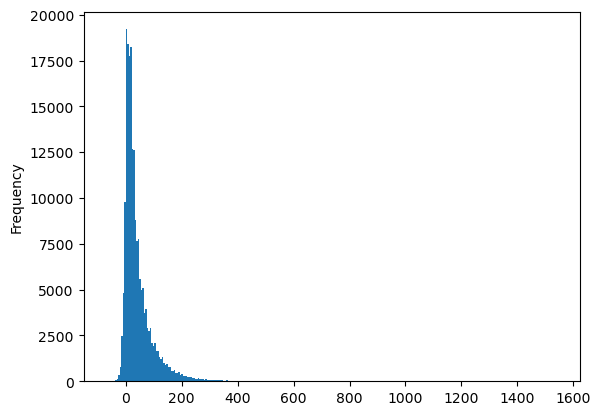

In [1273]:
df['Arrival_Delay'].plot(kind='hist', bins=300)

In [1274]:
df.dtypes

Day_Of_Week              int64
Carrier                 object
Flight_Number            int64
Tail_Number             object
Actual_Elapsed_Time    float64
Air_Time               float64
Arrival_Delay          float64
Departure_Delay        float64
Origin                  object
Destination             object
Distance                 int64
dtype: object

Por último vemos que el tipo de dato tiene sentido con lo que representan, así que los dejaremos sin modificar.

In [1275]:
#------- EXERCICI 2 --- ACABAT
### Troba quantes dades faltants hi ha per columna.
print('Los registros que faltan por columna son:')
pd.isnull(df).sum()

Los registros que faltan por columna son:


Day_Of_Week              0
Carrier                  0
Flight_Number            0
Tail_Number              0
Actual_Elapsed_Time    857
Air_Time               857
Arrival_Delay          857
Departure_Delay          0
Origin                   0
Destination              0
Distance                 0
dtype: int64

In [1276]:
#------- EXERCICI 2 --- ACABAT
### Depuración: Rellenar Na con la media.
df[['Actual_Elapsed_Time', 'Air_Time', 'Arrival_Delay']] = df[['Actual_Elapsed_Time', 'Air_Time', 'Arrival_Delay']].fillna(df[['Actual_Elapsed_Time', 'Air_Time', 'Arrival_Delay']].mean())

print(df.isna().sum())

Day_Of_Week            0
Carrier                0
Flight_Number          0
Tail_Number            0
Actual_Elapsed_Time    0
Air_Time               0
Arrival_Delay          0
Departure_Delay        0
Origin                 0
Destination            0
Distance               0
dtype: int64


In [1277]:
#------- EXERCICI 2 --- ACABAT
### Haz un análisis estadístico que consideres relevante.
df1 = df[['Day_Of_Week', 'Arrival_Delay']]
df1_DayOfWeek_Delay = df1.groupby('Day_Of_Week').aggregate(sum)
df1_DayOfWeek_Delay.sort_values(by='Arrival_Delay', ascending=False)

,Arrival_Delay
Day_Of_Week,
5,1.464918e+06
7,1.316373e+06
1,1.240536e+06
4,1.225713e+06
2,1.173323e+06
3,1.106881e+06
6,9.199458e+05


En esta nuevo data frame podemos ver que el mayor número de retrasos suceden los viernes (5) y los domingos (7) posiblemente debido a las idas y las vueltas del fin de semana, y que por la misma razón que el menor número de retrasos se dan en sábado (6).

In [1278]:
#------- EXERCICI 2 --- ACABAT
### Crear columna velocidad mediana de los vuelos, si han llegado tarde o no...
df2 = df[['Flight_Number', 'Air_Time', 'Distance', 'Arrival_Delay', 'Departure_Delay']]
df2["Mean_Speed(m/m)"] = df2['Distance'] / df2['Air_Time']
df2['Delayed'] = df2['Arrival_Delay'].apply(lambda x:'Yes' if x > 0 else 'No')
df2.head()

C:\Users\dcuxa\AppData\Local\Temp\ipykernel_32632\2382179659.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Mean_Speed(m/m)"] = df2['Distance'] / df2['Air_Time']
C:\Users\dcuxa\AppData\Local\Temp\ipykernel_32632\2382179659.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Delayed'] = df2['Arrival_Delay'].apply(lambda x:'Yes' if x > 0 else 'No')


,Flight_Number,Air_Time,Distance,Arrival_Delay,Departure_Delay,Mean_Speed(m/m),Delayed
0,2532,70.0,453,138.0,159.0,6.471429,Yes
1,7293,21.0,94,1.0,10.0,4.476190,Yes
2,1933,170.0,1345,8.0,11.0,7.911765,Yes
3,2431,183.0,1235,-4.0,10.0,6.748634,No
4,5862,96.0,668,84.0,57.0,6.958333,Yes


In [1279]:
#------- EXERCICI 2 --- ACABAT
### Fes una taula de les aerolínies amb més endarreriments acumulats.
df3 = df[['Carrier', 'Arrival_Delay']]
df3_UniqueCarrier_ArrDelay = df3.groupby('Carrier').aggregate(sum)
df3_UniqueCarrier_ArrDelay.sort_values(by='Arrival_Delay', ascending=False)

,Arrival_Delay
Carrier,
WN,1.174858e+06
AA,9.138043e+05
UA,7.106058e+05
MQ,6.656529e+05
OO,6.089595e+05
XE,5.482817e+05
DL,4.665184e+05
CO,4.319203e+05
EV,4.031474e+05


In [1280]:
#------- EXERCICI 2 --- ACABAT
### ¿Cuáles son los vuelos más largos?
df4 = df[['Flight_Number', 'Air_Time']]
df4_more_airtime = df4.groupby('Flight_Number').aggregate('max')
df4_more_airtime.sort_values(by='Air_Time', ascending=False)[:5]

,Air_Time
Flight_Number,
15,645.0
192,595.0
851,589.0
14,583.0
1273,576.0


In [1281]:
#------- EXERCICI 2 --- ACABAT
### I els més endarrerits?
df5 = df[['Flight_Number', 'Arrival_Delay']]
df5_more_delayed = df5.groupby('Flight_Number').aggregate('max')
df5_more_delayed.sort_values(by='Arrival_Delay', ascending=False)[:5]

,Arrival_Delay
Flight_Number,
1472,1542.0
1743,1490.0
1196,1395.0
394,1346.0
175,1170.0


In [1283]:
#------- EXERCICI 2 --- ACABAT
### Busca les rutes mes llarges.
df6 = df[['Distance', 'Origin', 'Destination']]
df6_longest_routes = df6.groupby(['Origin', 'Destination']).aggregate('max')
df6_longest_routes.sort_values(by=['Distance'], ascending=False)[:5]

Distance
Origin Destination          
EWR    HNL              4962
HNL    EWR              4962
ATL    HNL              4502
HNL    ATL              4502
       ORD              4243

In [1289]:
#------- EXERCICI 2 --- ACABAT
### ... y las rutas que acumulan más retrasos.
df7 = df[['Arrival_Delay', 'Origin', 'Destination']]
df7_more_delayed_routes = df7.groupby('Arrival_Delay').aggregate('max')
df7_more_delayed_routes.sort_values(by=['Arrival_Delay'], ascending=False)[:5]

,Origin,Destination
Arrival_Delay,,
1542.0,MOT,MSP
1490.0,BNA,MEM
1395.0,LAS,DTW
1346.0,SMF,MSP
1170.0,LAS,MEM
...,...,...
9.0,YUM,YUM
8.0,YUM,YUM
7.0,YUM,YUM


In [1292]:
#------- EXERCICI 2 --- ACABAT
### Aporta aquello que consideres relevante.
df8 = df[['Tail_Number', 'Arrival_Delay', 'Departure_Delay', 'Air_Time']]
df8_planes_more_delayed = df8.groupby('Tail_Number').aggregate(sum)
df8_planes_more_delayed.sort_values(by='Arrival_Delay', ascending=False)[:5]

,Arrival_Delay,Departure_Delay,Air_Time
Tail_Number,,,
N592ML,7788.0,7637.0,4939.0
N506MJ,7163.0,7073.0,6896.0
N154SF,6819.0,6552.0,5081.0
N650ML,6548.0,6220.0,4449.0
N37208,6433.0,6296.0,5739.0


En esta última consulta quería ver si había algún tipo de relación entre el avión que realiza el vuelo (Tail_Number), el retraso total y el número de vuelos realizado, sin embargo, no he logrado asociar estas tres columnas.

In [1299]:
#df.query("Tail_Number == 'N592ML'")
df['Tail_Number'].value_counts()

N676SW    109
N370SW    109
N506SW    108
N634SW    105
N758EV    102
         ... 
N545US      1
N979AS      1
N1613B      1
N736MQ      1
N7BEAA      1
Name: Tail_Number, Length: 5266, dtype: int64

In [1287]:
#------- EXERCICI 3 --- ACABAT

#df.to_excel('Sprint_03_Tasca_02.xlsx', sheet_name='Sheet1')